In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/english-premier-league202021/EPL_20_21.csv


In [2]:
dataset = pd.read_csv('../input/english-premier-league202021/EPL_20_21.csv')

In [3]:
dataset

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Lys Mousset,Sheffield United,FRA,"FW,MF",24,11,2,296,0,0,50,80.0,0,0,0.22,0.10,0,0
528,Jack O'Connell,Sheffield United,ENG,DF,26,2,2,180,0,0,77,77.9,0,0,0.00,0.00,0,0
529,Iliman Ndiaye,Sheffield United,FRA,MF,21,1,0,12,0,0,3,100.0,0,0,0.00,0.00,0,0
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,1,100.0,0,0,1.16,0.00,0,0


In [4]:
dataset.isnull().sum()

Name                     0
Club                     0
Nationality              0
Position                 0
Age                      0
Matches                  0
Starts                   0
Mins                     0
Goals                    0
Assists                  0
Passes_Attempted         0
Perc_Passes_Completed    0
Penalty_Goals            0
Penalty_Attempted        0
xG                       0
xA                       0
Yellow_Cards             0
Red_Cards                0
dtype: int64

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
chelseaTeam = dataset[dataset['Club'] == 'Chelsea']

# xG for Chelsea players

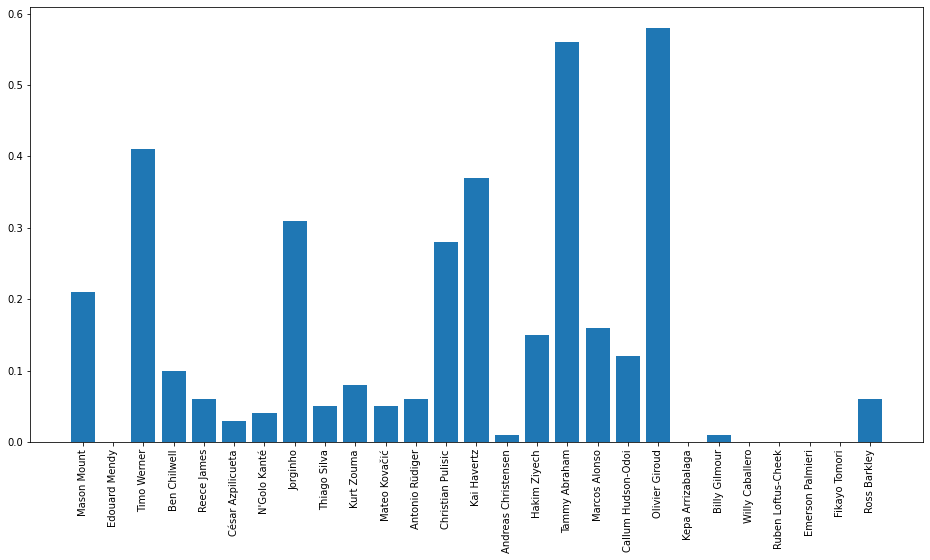

In [8]:
plt.figure(figsize=(16,8))
plt.bar(chelseaTeam['Name'],chelseaTeam['xG'])
plt.xticks(rotation=90)
plt.show()

# xA for Chelsea players

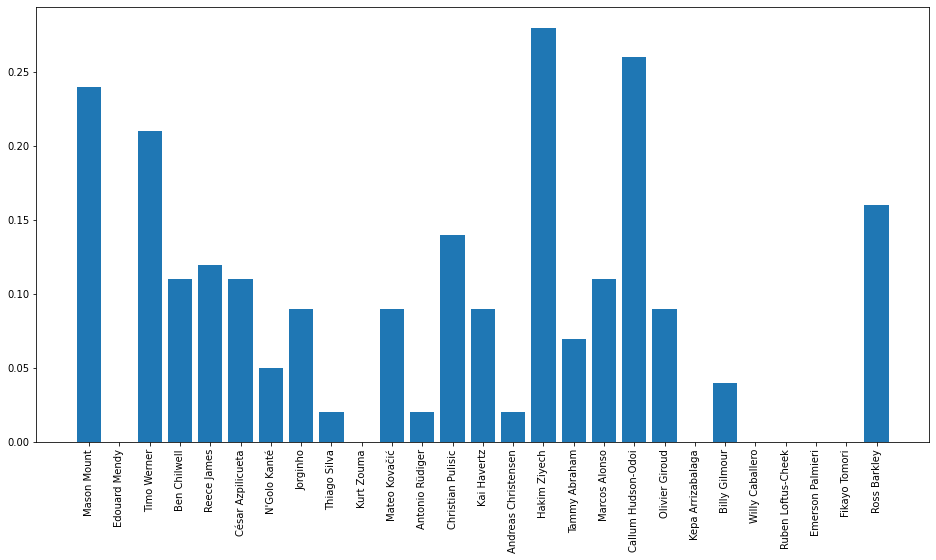

In [9]:
plt.figure(figsize=(16,8))
plt.bar(chelseaTeam['Name'],chelseaTeam['xA'])
plt.xticks(rotation=90)
plt.show()

# Showing Top players have xG 

In [10]:
topPlayersWithXG = dataset.sort_values(by=['xG'],ascending = False)
topPlayersWithXG.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
530,Antwoine Hackford,Sheffield United,ENG,"DF,FW",16,1,0,11,0,0,1,100.0,0,0,1.16,0.00,0,0
110,Jamie Vardy,Leicester City,ENG,FW,33,34,31,2840,15,9,452,66.4,8,9,0.62,0.16,1,0
339,Patrick Cutrone,Wolverhampton Wanderers,ITA,"FW,MF",22,2,0,25,0,0,5,80.0,0,0,0.61,0.00,0,0
81,Mohamed Salah,Liverpool FC,EGY,FW,28,37,34,3078,22,5,1288,83.2,6,6,0.61,0.18,0,0
162,Harry Kane,Tottenham Hotspur,ENG,FW,27,35,35,3082,23,14,937,70.1,4,4,0.60,0.22,1,0


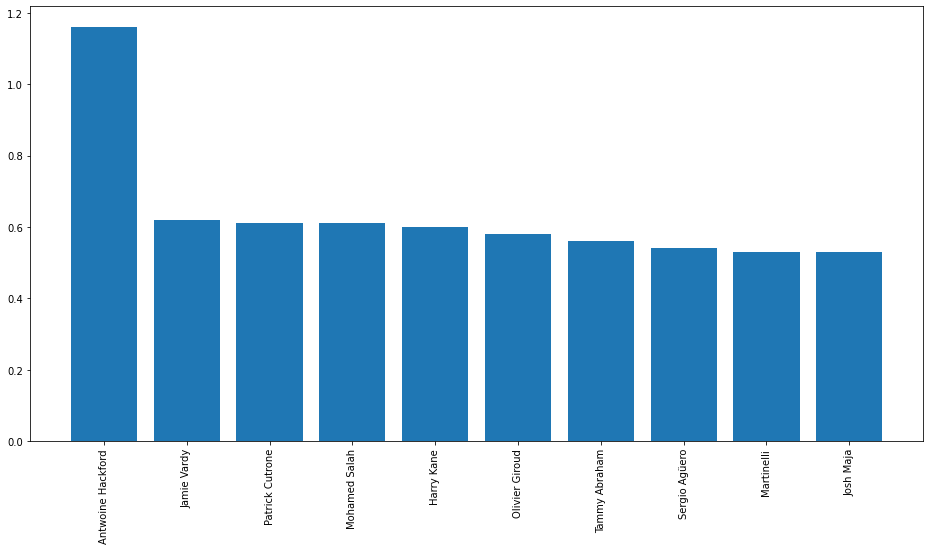

In [11]:
plt.figure(figsize=(16,8))
plt.bar(topPlayersWithXG['Name'][:10],topPlayersWithXG['xG'][0:10])
plt.xticks(rotation=90)
plt.show()

# Ignoring Players who played less than 10 matches 

In [12]:
df2 = dataset[dataset['Matches']>=10]

In [13]:
df2

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,Kean Bryan,Sheffield United,ENG,DF,23,13,12,1004,1,0,443,72.9,0,0,0.04,0.03,1,0
522,Jack Robinson,Sheffield United,ENG,DF,26,11,9,877,0,1,439,80.6,0,0,0.04,0.09,3,0
523,Billy Sharp,Sheffield United,ENG,FW,34,16,7,735,3,0,123,69.9,2,2,0.33,0.07,1,0
525,Phil Jagielka,Sheffield United,ENG,DF,37,10,6,526,0,0,186,76.3,0,0,0.00,0.00,1,1


# Top players have xA

In [14]:
topPlayersWithXA = df2.sort_values(by=['xA'],ascending = False)

In [15]:
topPlayersWithXA

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
414,Alireza Jahanbakhsh,Brighton,IRN,"FW,MF",26,21,6,528,0,1,265,74.0,0,0,0.28,0.54,3,0
99,Xherdan Shaqiri,Liverpool FC,SUI,"MF,FW",28,14,5,556,0,2,426,83.6,0,0,0.06,0.49,2,0
34,Kevin De Bruyne,Manchester City,BEL,MF,29,25,23,1997,6,12,1406,76.0,2,3,0.44,0.46,1,0
273,Jack Grealish,Aston Villa,ENG,"FW,MF",24,26,24,2185,6,10,1100,78.5,0,0,0.18,0.35,6,0
51,Bruno Fernandes,Manchester United,POR,MF,25,37,35,3099,18,12,2283,74.6,9,10,0.45,0.32,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,Martin Dúbravka,Newcastle United,SVK,GK,31,13,13,1170,0,0,427,72.6,0,0,0.00,0.00,0,0
305,Fabian Schär,Newcastle United,SUI,DF,28,18,13,1246,1,0,583,77.7,1,1,0.08,0.00,4,1
297,Jamaal Lascelles,Newcastle United,ENG,DF,26,19,19,1625,2,0,599,81.3,0,0,0.05,0.00,4,0
290,Karl Darlow,Newcastle United,ENG,GK,29,25,25,2250,0,0,726,50.1,0,0,0.00,0.00,3,0


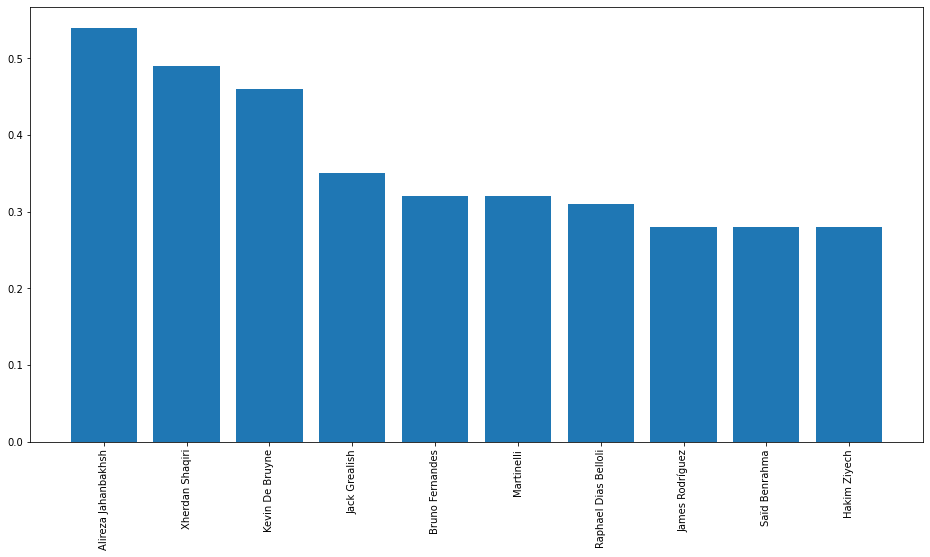

In [16]:
plt.figure(figsize=(16,8))
plt.bar(topPlayersWithXA['Name'][:10],topPlayersWithXA['xA'][0:10])
plt.xticks(rotation=90)
plt.show()

# Top players scored penalties

In [17]:
topPenalties = dataset.sort_values(by = ['Penalty_Goals'],ascending = False)

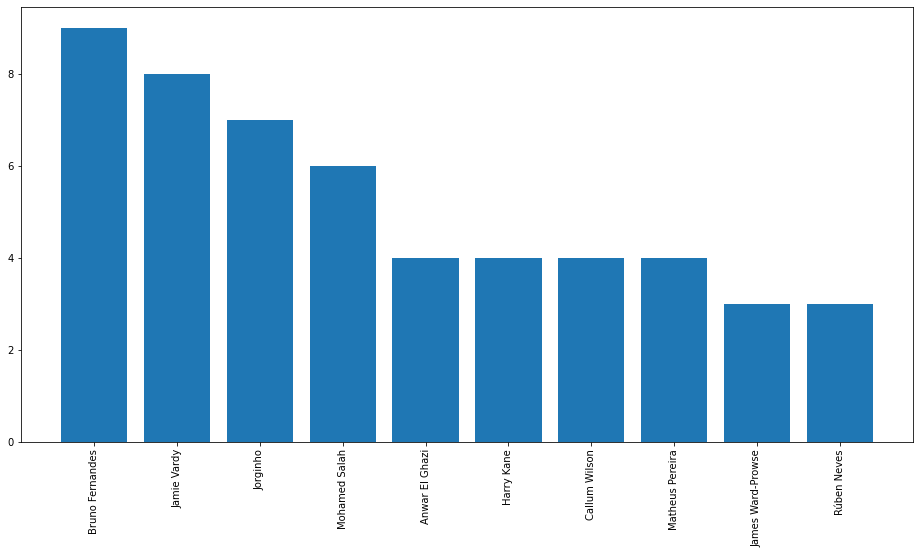

In [18]:
plt.figure(figsize=(16,8))
plt.bar(topPenalties['Name'][:10],topPenalties['Penalty_Goals'][0:10])
plt.xticks(rotation=90)
plt.show()

# Top players have Pass Completed

In [19]:
topplayersWithPercPassesCompleted = df2.sort_values(by=['Perc_Passes_Completed'],ascending = False)

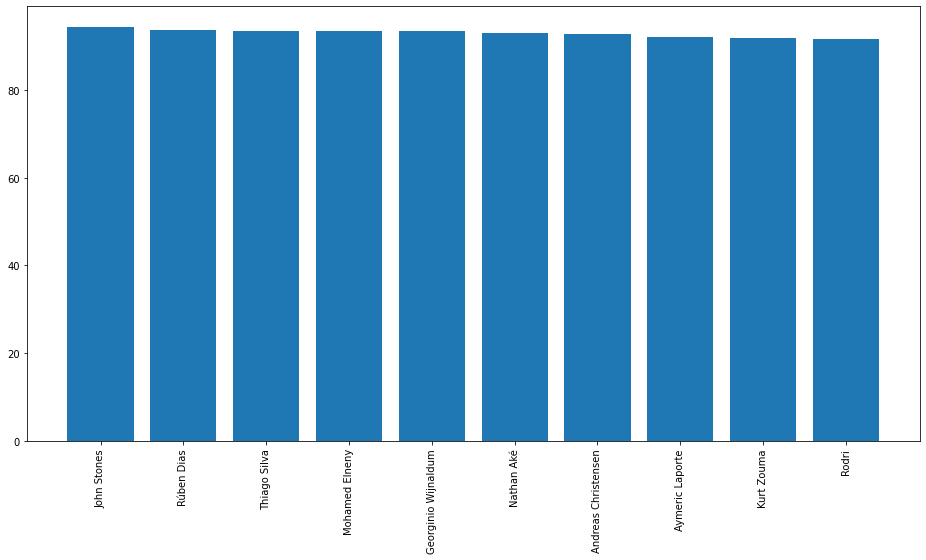

In [20]:
plt.figure(figsize=(16,8))
plt.bar(topplayersWithPercPassesCompleted['Name'][:10],topplayersWithPercPassesCompleted['Perc_Passes_Completed'][:10])
plt.xticks(rotation = 90)
plt.show()

# Ignoring defenders from players have top Pass Completed 

In [21]:
playersNotDF = topplayersWithPercPassesCompleted[topplayersWithPercPassesCompleted['Position'] != 'DF']

In [22]:
playersNotDF

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
195,Mohamed Elneny,Arsenal,EGY,MF,28,23,17,1544,1,0,1003,93.4,0,0,0.03,0.01,3,0
83,Georginio Wijnaldum,Liverpool FC,NED,MF,29,38,34,2941,2,0,1747,93.3,0,0,0.10,0.05,1,0
29,Rodri,Manchester City,ESP,MF,24,34,31,2748,2,2,2728,91.5,1,1,0.08,0.06,6,0
121,Nampalys Mendy,Leicester City,SEN,MF,28,23,15,1459,0,1,965,91.4,0,0,0.01,0.02,5,0
91,Curtis Jones,Liverpool FC,ENG,MF,19,24,13,1179,1,2,976,91.2,0,0,0.11,0.12,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,Vicente Guaita,Crystal Palace,ESP,GK,33,37,37,3330,0,0,1080,55.4,0,0,0.00,0.00,2,0
426,Nick Pope,Burnley,ENG,GK,28,32,32,2880,0,0,979,50.7,0,0,0.00,0.01,1,0
290,Karl Darlow,Newcastle United,ENG,GK,29,25,25,2250,0,0,726,50.1,0,0,0.00,0.00,3,0
475,Sam Johnstone,West Bromwich Albion,ENG,GK,27,37,37,3330,0,1,1282,49.9,0,0,0.00,0.01,1,0


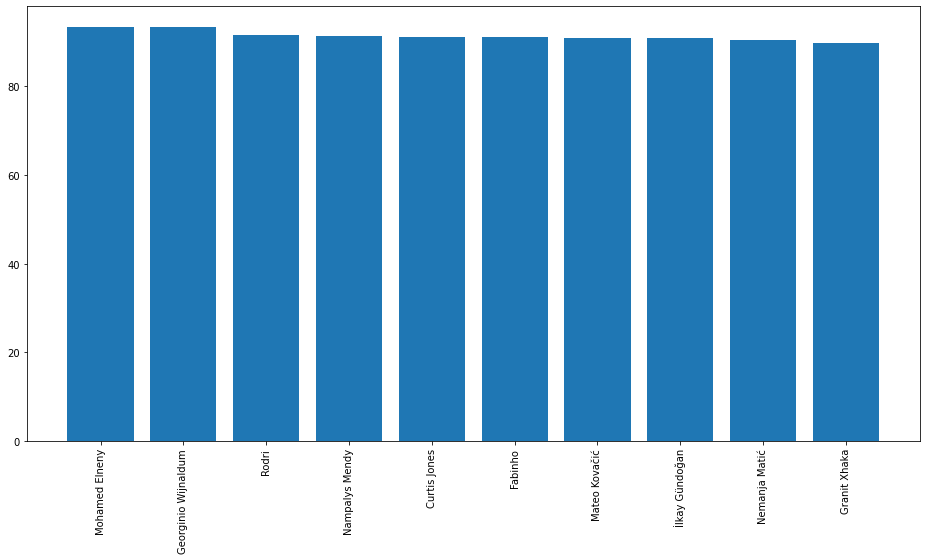

In [23]:
plt.figure(figsize=(16,8))
plt.bar(playersNotDF['Name'][:10],playersNotDF['Perc_Passes_Completed'][:10])
plt.xticks(rotation = 90)
plt.show()

# Top players have yellow cards

In [24]:
topYellowCardsPlayers = df2.sort_values(by=['Yellow_Cards'],ascending = False)


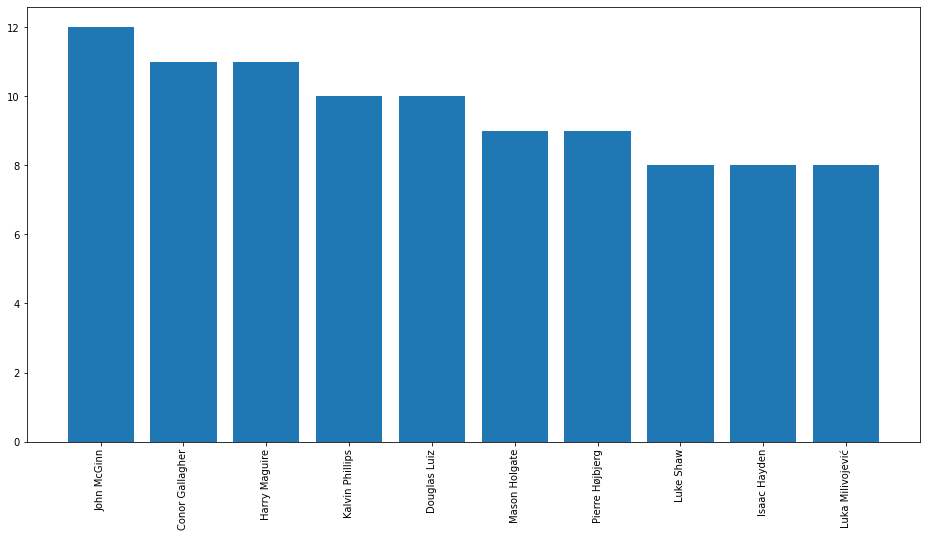

In [25]:
plt.figure(figsize=(16,8))
plt.bar(topYellowCardsPlayers['Name'][:10],topYellowCardsPlayers['Yellow_Cards'][:10])
plt.xticks(rotation = 90)
plt.show()

# Top teams have yellow Cards

In [26]:
df2.groupby(['Club']).sum().sort_values(by=['Yellow_Cards'],ascending = False)

,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
Club,,,,,,,,,,,,,,
Sheffield United,550,504,406,36418,18,13,15505,1586.5,3,4,2.00,1.29,72,3
Aston Villa,416,482,405,36328,50,37,15997,1310.9,5,6,2.49,1.68,65,4
Newcastle United,640,515,409,36703,44,26,13897,1783.7,6,7,2.64,1.51,65,3
Fulham,465,499,397,35596,25,18,17756,1514.4,3,6,2.30,1.48,62,3
Leeds United,480,517,414,37120,60,45,19851,1498.4,4,4,2.65,2.00,61,1
Manchester United,453,475,393,35334,68,46,20488,1501.1,9,10,2.69,1.65,61,1
Leicester City,504,491,408,36485,64,43,19792,1600.6,10,12,2.58,1.47,57,0
Crystal Palace,539,492,406,36452,38,29,14772,1432.8,3,4,1.50,1.07,55,2
Everton,470,489,406,36317,45,32,17644,1428.3,4,5,2.23,1.47,55,2


# Top teams have red cards

In [27]:
topTeamsWithRedCards = df2.groupby(['Club']).sum().sort_values(by=['Red_Cards'],ascending = False)

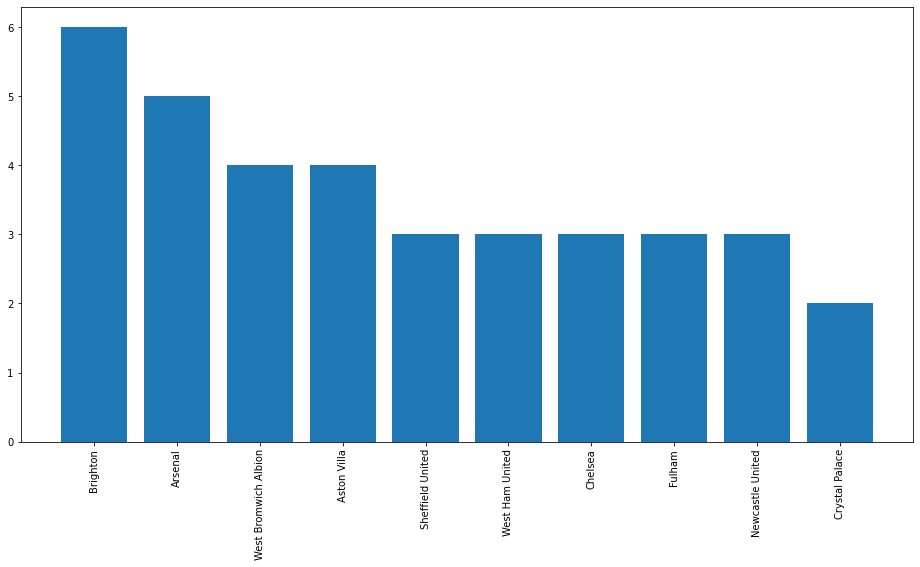

In [28]:
plt.figure(figsize=(16,8))
plt.bar(topTeamsWithRedCards.index[:10],topTeamsWithRedCards['Red_Cards'][:10])
plt.xticks(rotation = 90)
plt.show()

# Top teams have penalties

In [29]:
topTeamsWithPenalty = df2.groupby(['Club']).sum().sort_values(by=['Penalty_Attempted'],ascending = False)

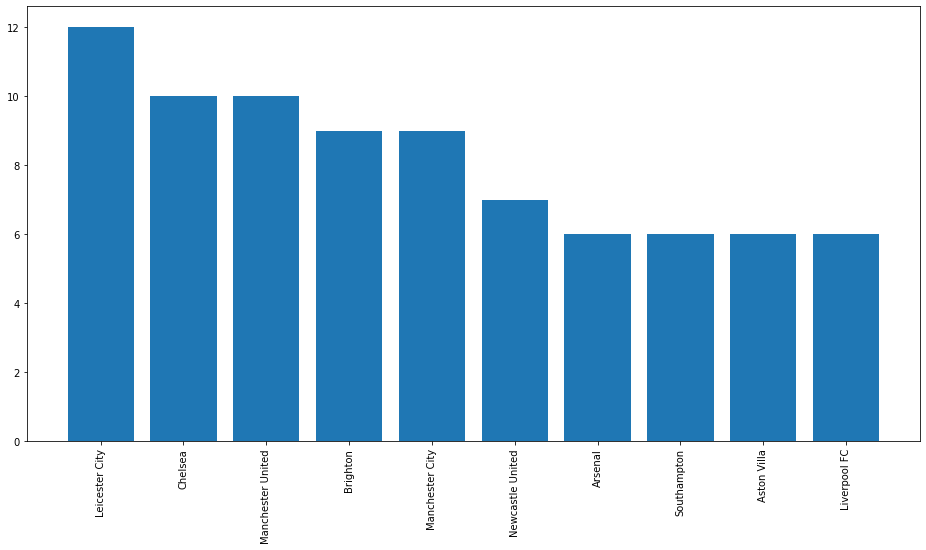

In [30]:
plt.figure(figsize=(16,8))
plt.bar(topTeamsWithPenalty.index[:10],topTeamsWithPenalty['Penalty_Attempted'][:10])
plt.xticks(rotation = 90)
plt.show()